# **Hands on: Persistent Homology**
## Ximena Fernández
#### Department of Mathematical Sciences, Durham University
#### _UK Centre Topological Data Analysis_

_This notebook is meant to be a first step introduction to some available tools for computation of Persistent Homology using Python._

## Homology and Persistent Homology

<img src='figures/homology_betti.png' width="400" height="100"> 

 **Goal:** Infer information about the *homology* of the underlying topological space from a sample.

### _Pipeline_

<tr><td><img src='figures/sample_circle.png' width="400" height="400"> </td><td><img src='figures/filtration_circle.gif' width="600" height="600"> </td><td><img src='figures/PH.png' width="350" height="350">  </td></tr>

### _Software_

A (probably incomplete) list of available packages for the computation of TDA signatures (see also <a href="https://people.clas.ufl.edu/peterbubenik/intro-to-tda/" target="_blank">TDA tools</a>&nbsp;by Peter Bubenik)

- [SciKitTDA](https://scikit-tda.org/) by Nataniel Saul and Chris Tralie
- [Ripser](https://github.com/Ripser/ripser) by Ulrich Bauer (C++)
- [Ripser-live](http://live.ripser.org/)  by Ulrich Bauer (browser)
- [GUDHI](http://gudhi.gforge.inria.fr/) developed at INRIA
- [Giotto-tda](https://giotto-ai.github.io/) developted at EPFL
- [Cubicle](https://bitbucket.org/hubwag/cubicle/src/master/) by Hubert Wagner
- [HomcCube](https://i-obayashi.info/software.html) By Ippei Obayashi.
- [DIPHA](https://github.com/DIPHA/dipha) by Ulrich Bauer and Michael Kerber
- [diamorse](https://github.com/AppliedMathematicsANU/diamorse) developed at The Australian National University.
- [Perseus](http://people.maths.ox.ac.uk/nanda/perseus/) by Vidit Nanda
- [Dionysus2](https://www.mrzv.org/software/dionysus2/) by Dimitry Morozov (C++, Python)
- [CliqueTop](https://github.com/nebneuron/clique-top) by Chad Giusti (Matlab)
- [Eirene](http://gregoryhenselman.org/eirene/index.html) by Greg Henselman (Julia)
- [CHomP](https://github.com/shaunharker/CHomP") by Shaun Harker (C++) 
- [Hera](https://bitbucket.org/grey_narn/hera) by Michael Kerber, Dmitriy Morozov, and Arnur Nigmetov
- [JavaPlex](https://github.com/appliedtopology) by Andrew Tausz, Mikael Vejdemo-Johansson and Henry Adams
- [PHAT](https://bitbucket.org/phat-code/phat) by Ulrich Bauer, Michael Kerber, Jan Reininghaus, Hubert Wagner, and Bryn Keller
- [Teaspoon](http://elizabethmunch.com/code/teaspoon/index.html) By Liz Munch and Firas Khasawneh
-    <a href="https://topology-tool-kit.github.io/" target="_blank">Topology ToolKit</a>&nbsp;(C++) by&nbsp;Julien Tierny, Guillaume Favelier, Joshua Levine, Charles Gueunet, and Micha&euml;l Michaux
-   <a href="https://cran.r-project.org/web/packages/TDA/index.html" target="_blank">TDA</a>&nbsp;(R)&nbsp;by&nbsp;Brittany T. Fasy, Jisu Kim, Fabrizio Lecci, and Cl&eacute;ment Maria
-    <a href="https://github.com/paultpearson/TDAmapper" target="_blank">TDAMapper </a>(R) by&nbsp;Paul Pearson, Daniel M&uuml;ellner, and Gurjeet Singh
-    <a href="https://github.com/nebneuron/Simplicial" target="_blank">Simplicial complexes for Julia</a> by Alex Kunin and Vladimir Itskov
-    <a href="http://web.cse.ohio-state.edu/~dey.8/SimBa/Simba.html" target="_blank">SimBa</a>&nbsp;and&nbsp;<a href="http://web.cse.ohio-state.edu/~dey.8/SimPers/Simpers.html" target="_blank">SimPer</a>&nbsp;(C++) by&nbsp;Tamal K Dey, &nbsp;Fengtao Fan, &nbsp;Dayu Shi, &nbsp;and Yusu Wan&nbsp;
- <a href="http://danifold.net/mapper/index.html" target="_blank">Python Mapper</a>&nbsp;(Python) by&nbsp;Daniel M&uuml;llner and Aravindakshan Babu
-    <a href="https://www.math.upenn.edu/~dlotko/persistenceLandscape.html" target="_blank">Persistence Landscape Toolbox</a>&nbsp;(C++) by Pawel Dlotko&#8203;

## 1.First steps

### Point clouds

In [5]:
import tadasets
circle = tadasets.dsphere(d = 1, n=100)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

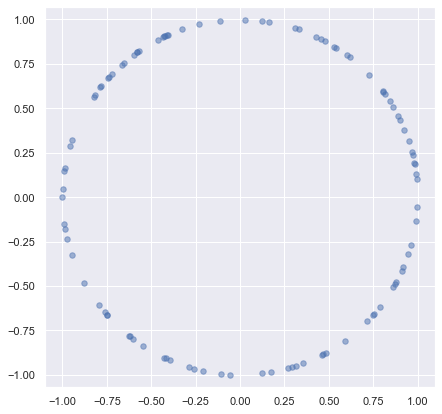

In [15]:
sns.set()
plt.figure(figsize = (7,7))
plt.scatter(circle[:,0], circle[:,1],  s = 30, alpha = 0.5)
plt.axis('equal')
plt.show()

### Computation of persistent homology

In [9]:
from ripser import Rips

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


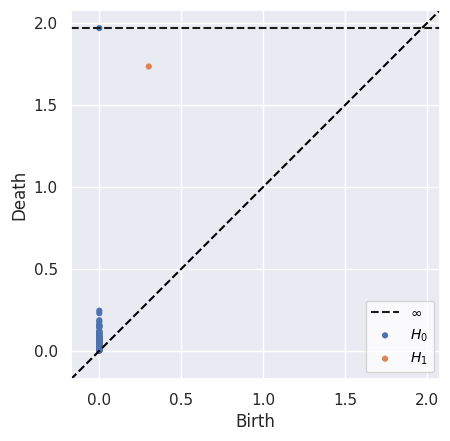

In [180]:
sns.set()
rips = Rips()
dgms = rips.fit_transform(circle)
rips.plot(dgms)

### Examples

- #### Torus

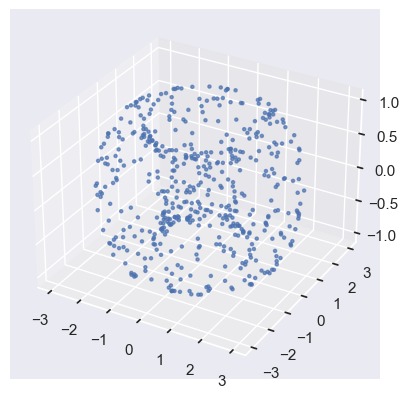

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


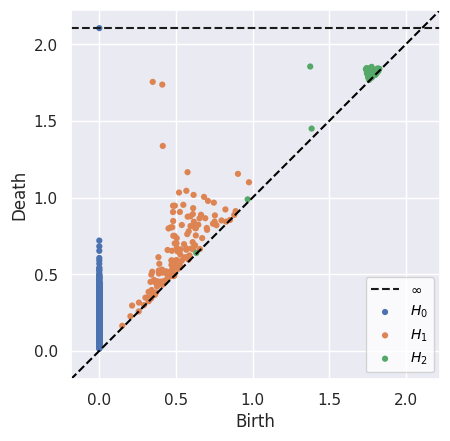

In [137]:
sns.set()
torus = tadasets.torus(n=500)
tadasets.plot3d(torus, s = 5, alpha = 0.7)
plt.show()
rips = Rips(maxdim = 2)
dgms = rips.fit_transform(torus)
rips.plot(dgms)

- #### Sphere

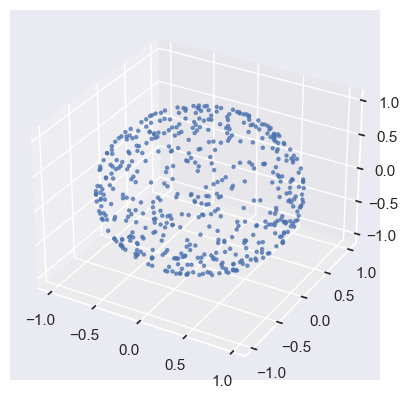

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


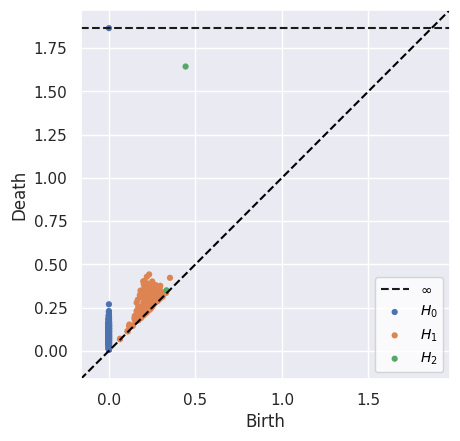

In [134]:
sns.set()
sphere = tadasets.dsphere(n=500)
tadasets.plot3d(sphere, s = 5, alpha = 0.7)
plt.show()
rips = Rips(maxdim = 2)
dgms = rips.fit_transform(sphere)
rips.plot(dgms)

## 2. Noisy data and stability

We generate two datasets: a circle and a noisy circle. We will compare the behaviour of persistent homology in presence of noise.

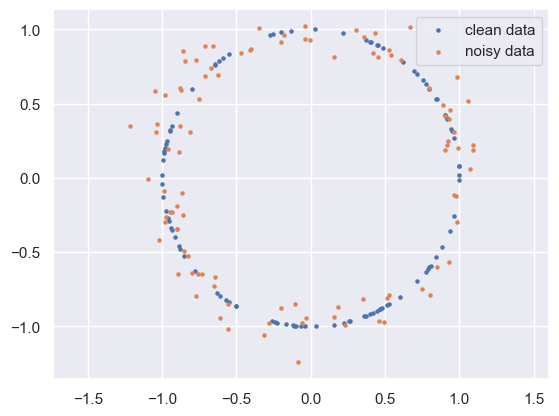

In [94]:
data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.1)

sns.set()
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data", s = 5)
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data", s = 5)
plt.axis('equal')
plt.legend()
plt.show()

We compare its persistence diagrams at degree 1.

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


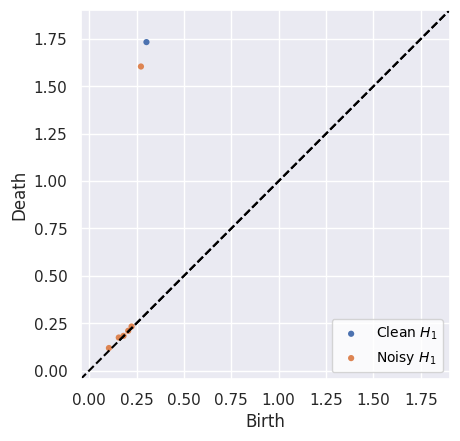

In [95]:
rips = Rips()
dgm_noisy = rips.fit_transform(data_noisy)[1]
dgm_clean = rips.fit_transform(data_clean)[1]
rips.plot(dgm_clean, labels = 'Clean $H_1$')
rips.plot(dgm_noisy, labels = 'Noisy $H_1$')

- ### Bottleneck distance

Given two persistence diagrams $\mathrm{dgm_1}$ y $\mathrm{dgm_2}$, its **bottleneck distance** is defined as:

$$d_b(\mathrm{dgm_1},\mathrm{dgm_2}) = \inf_{M \text{ matching }} \sup_{(x,y)\in M} ||x-y||_{\infty}$$

where $M\subseteq \mathrm{dgm_1}\times \mathrm{dgm_2}$ is a matching, and we consider the points in the diagonal as part of both diagrams.

In [97]:
import persim
distance_bottleneck, matching = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)
persim.bottleneck(dgm_clean, dgm_noisy)

0.12893497943878174

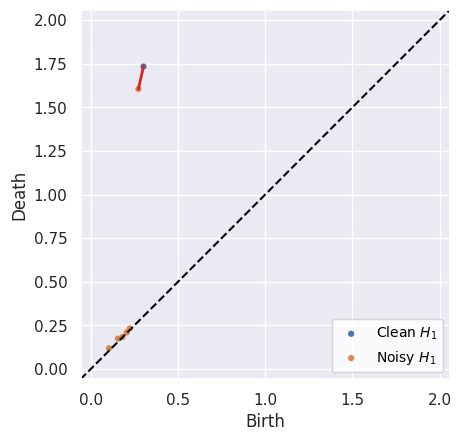

In [98]:
sns.set()
persim.bottleneck_matching(dgm_clean, dgm_noisy, matching,  labels=['Clean $H_1$', 'Noisy $H_1$'])

Let's inspect the evolution of the bottleneck distance between the diagrams of the data with and without noise, for different levels of noise.

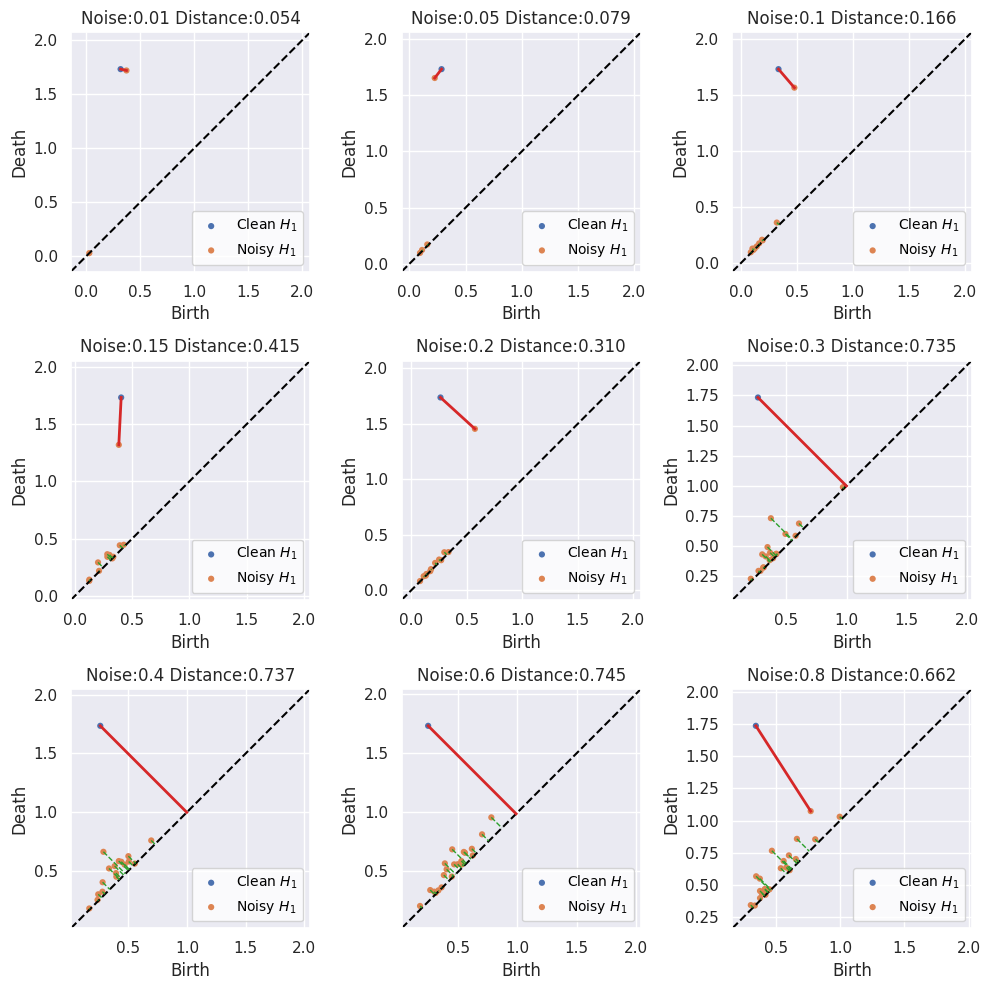

In [105]:
fig = plt.figure(figsize = (10,10))

for i, n in enumerate([0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8]):
    sns.set()
    plt.subplot(331+i)

    data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
    dgm_clean = rips.fit_transform(data_clean)[1]
    
    data_noisy = tadasets.dsphere(d=1, n=100, noise=n)
    dgm_noisy = rips.fit_transform(data_noisy)[1]
    
    d, matching = persim.bottleneck(
        dgm_clean,
        dgm_noisy,
        matching=True
    )
    persim.bottleneck_matching(dgm_clean, dgm_noisy, matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
    
    plt.title("Noise:{} Distance:{:.3f}".format(n, d))

plt.tight_layout()

- ### Stability

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


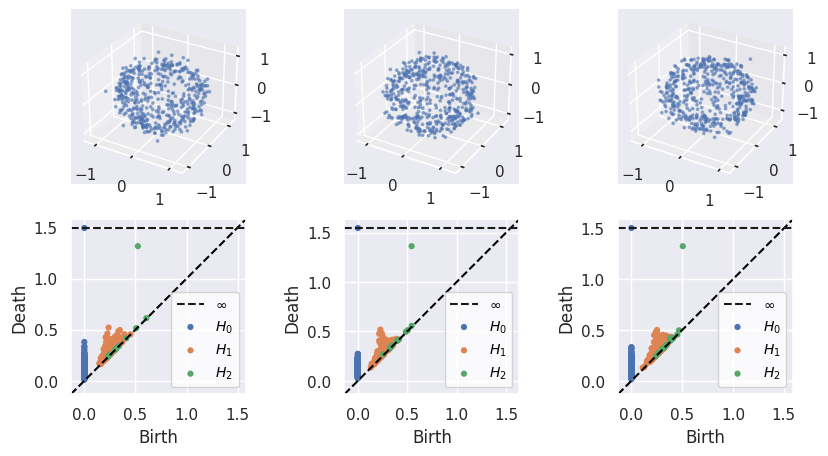

In [212]:
fig = plt.figure(figsize = (10,5))
rips = Rips(maxdim = 2)

for i in range(3):
    sns.set()
    ax = fig.add_subplot(231+i, projection='3d')
    sphere = tadasets.dsphere(n=500, noise = 0.1)
    ax.scatter(sphere[:,0], sphere[:,1], sphere[:,2], s = 3, alpha = 0.5)
    ax = fig.add_subplot(234+i)
    dgm = rips.fit_transform(sphere)
    rips.plot(dgm)

Recall that the **Gromov-Hausdorff distance** between two compact metric psaces $(X, d_X)$ e $(Y, d_Y)$ is defined as:

$$d_{GH}(X,Y) = \frac{1}{2}\inf_{R\subseteq X\times Y}\sup_{(x,y), (x', y')\in R}|d_X(x,x')-d_Y(y,y')|$$

where $R$ is a _correspondence_ (ie, $\forall x\in X, \exists y\in Y$ such that $(x,y)\in R$ and analogously for $Y$)
 
Equivalently, 

$$d_{GH}(X,Y) = \inf_{(Z, d_Z)}\{d_H\left(\phi_X(X),\phi_Y(Y)\right):\phi_X:X\to Z,\phi_Y:Y\to Z \text{ isometries}\}$$

where $d_H$ denotes the Hausdorff distance.


- Frédéric Chazal, Vin de Silva, Marc Glisse, and Steve Oudot. (2012) **The structure and stability of persistence modules**.

**Theorem (Chazal et.al, 2012)**: If $X, Y$ are two compact metric spaces, then 

$$d_b(\mathrm{dgm(Filt}(X)), \mathrm{dgm(Filt}(Y)))\leq 2 d_{GH}(X,Y)$$

- Fasy, B.T., Lecci, F., Rinaldo, A., Wasserman, L., Balakrishnan, S., & Singh, A. (2014). **Confidence sets for persistence diagrams.** Annals of Statistics, 42, 2301-2339.

**Theorem (Fasy et.al 2014)**: Given $\alpha>0$, there exixts $c_n = c(X_n)$ such that 

$$\liminf_{n\to\infty} P\big(d_b\mathrm{(dgm(Filt}(X_n), \mathrm{dgm(Filt}(X))\in [0, c_n]\big)\geq 1-\alpha$$

Es decir, $[0,c_n]$ es un intervalo de confianza asintótico para $d_b\mathrm{(dgm(Filt}(X_n), \mathrm{dgm(Filt}(X))$.

## 3. Convergence

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


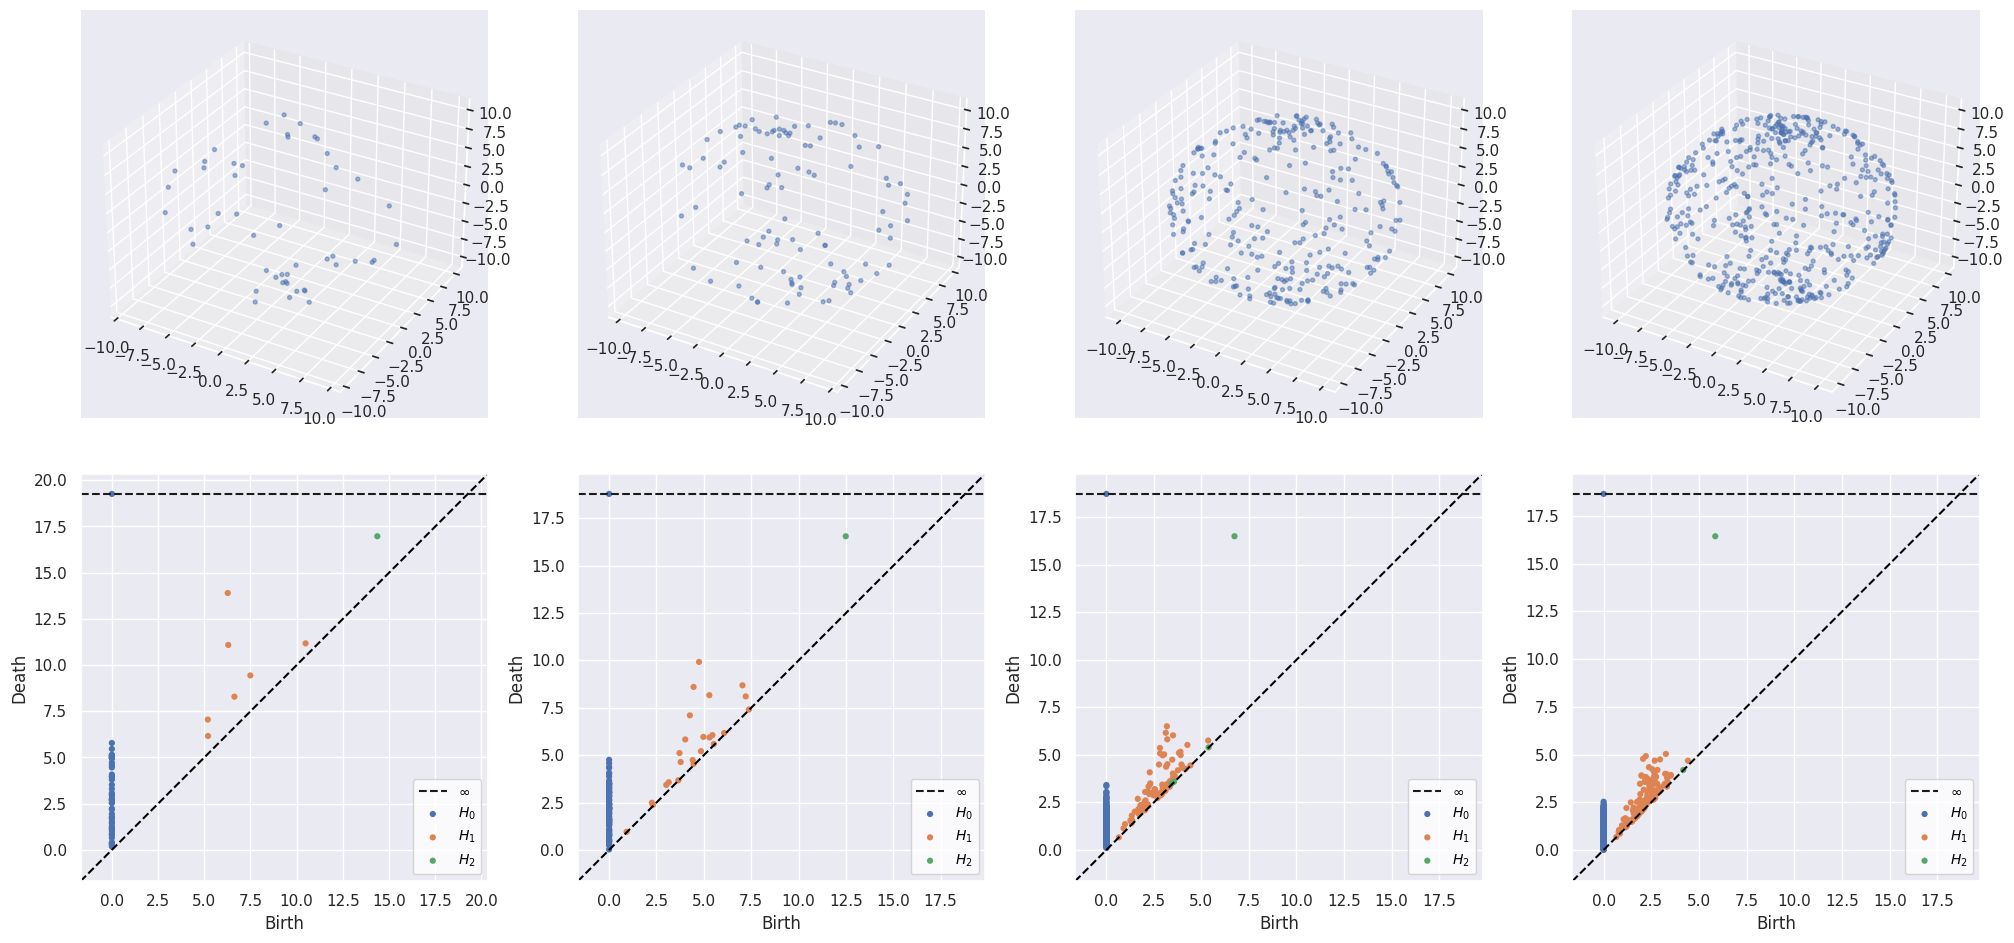

In [219]:
rips = Rips(maxdim = 2)
fig = plt.figure(figsize = (20,10))

size = [50, 100, 300, 500]
for i,n in enumerate(size):
    sns.set()
    sphere = tadasets.sphere(n, r = 10)
    ax = fig.add_subplot(241+i, projection='3d')
    ax.scatter(sphere[:,0], sphere[:,1], sphere[:,2], s = 8, alpha = 0.5)
    ax = fig.add_subplot(245+i)
    dgm = rips.fit_transform(sphere)
    rips.plot(dgm)
plt.tight_layout()

**Theorem (Chazal et.al. 2015):**

Let $(M, \rho)$ be a metric space. Let $X_n$ be an i.i.d. sample of $M$ with respect to a(n unknown) probability measure $\mu$. Let $X_{\mu}\subseteq M$ be the support of $\mu$. If $\mu$ satisfies that:
- $X_{\mu}$ is compact;
- there exists $a,b>0$ such that  $r>0$, $x\in X_{\mu}$, $\mu(B(x,r))>\min(ar^b, 1).$

Then,

$$E[d_b(\mathrm{dgm(Filt}(X_{\mu})), \mathrm{dgm(Filt}(X_n))]\leq C\left(\dfrac{\ln(n)}{n}\right)^{1/b}$$

where $C$ only depends on $a$ and $b$.


## 4. Orientability

**Orientability** of _manifolds_ characterizes the property of _synchronizing_ oriented local coverings into a global description. In particular, it is an _homeomorphism invariant_ that captures geometric properties of different nature than homology. 
For instance, the cylinder and the Mobius band have both the same homology, but the former is orientable while the latter is non-orientable. 

- **Property:** In the case of _closed manifolds_ (compact manifolds without boundary) _homology with coefficients in different finite fields_ can be used to characterize orientability. A closed $d$-manifold $M$ is orientable if (and only if) $H_d(M, \mathbb{Z}_3)$  is non-null. 

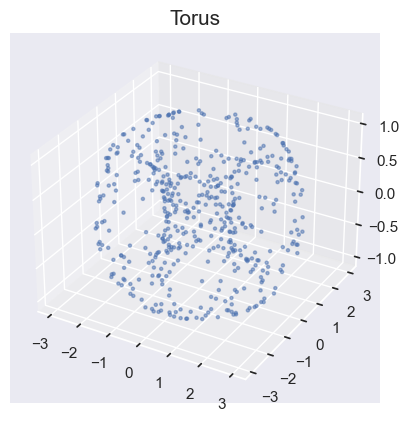

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=3, do_cocycles=False, n_perm = None, verbose=True)


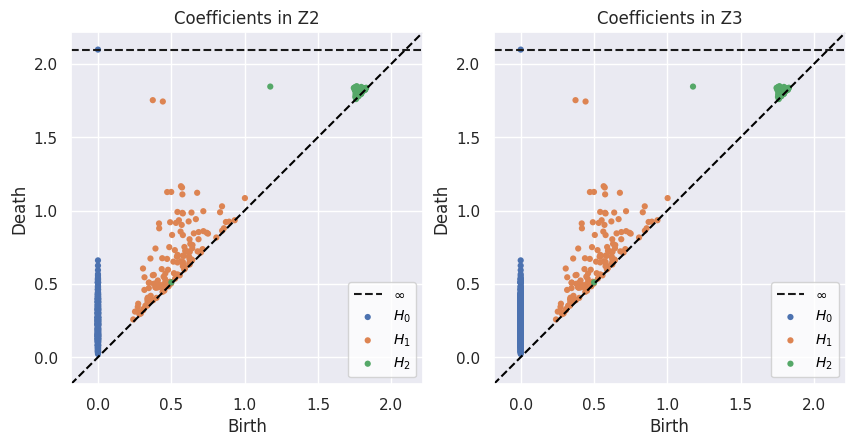

In [228]:
sns.set()
torus = tadasets.torus(n=500)
tadasets.plot3d(torus, s = 5, alpha = 0.5)
plt.title('Torus' , fontsize=15)
plt.show()

fig = plt.figure(figsize = (10,10))

sns.set()
plt.subplot(121)
rips = Rips(maxdim = 2, coeff = 2)
dgms = rips.fit_transform(torus)
rips.plot(dgms, title = 'Coefficients in Z2')

sns.set()
plt.subplot(122)
rips = Rips(maxdim = 2, coeff = 3)
dgms = rips.fit_transform(torus)
rips.plot(dgms, title = 'Coefficients in Z3')

In [2]:
import numpy as np 

def klein(theta, phi, r, a):
    x = (r*np.cos(theta) + a) * np.cos(phi)
    y = (r*np.cos(theta) + a) * np.sin(phi)
    z = r*np.sin(theta) * np.cos(phi/2)
    w = r*np.sin(theta) * np.sin(phi/2)
    return np.column_stack((np.concatenate(x),np.concatenate(y),np.concatenate(z),np.concatenate(w)))

n, m = 20,25
theta, phi = np.meshgrid(np.linspace(0, 2.*np.pi, n), np.linspace(0, 2.*np.pi, m))
klein = klein(theta, phi, 2, 1)

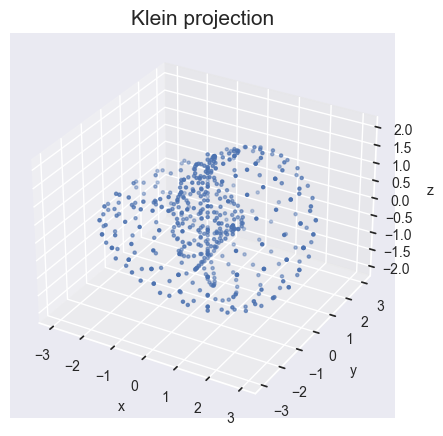

In [225]:
sns.set()
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(klein[:,0],klein[:,1],klein[:,2], s=5)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
plt.tick_params(labelsize=10)
ax.set_title('Klein projection', fontsize=15);

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=3, do_cocycles=False, n_perm = None, verbose=True)


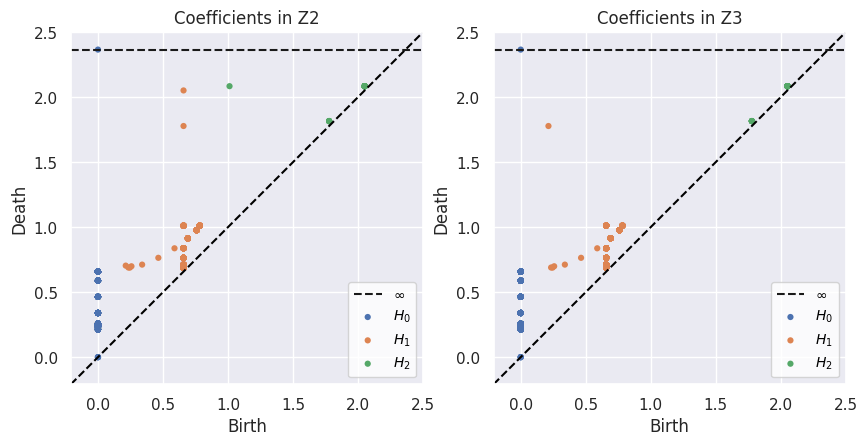

In [15]:
fig = plt.figure(figsize = (10,10))

sns.set()
plt.subplot(121)
rips = Rips(maxdim = 2, coeff = 2)
dgms = rips.fit_transform(klein)
rips.plot(dgms, title = 'Coefficients in Z2')

sns.set()
plt.subplot(122)
rips = Rips(maxdim = 2, coeff = 3)
dgms = rips.fit_transform(klein)
rips.plot(dgms, title = 'Coefficients in Z3')

## 5. Singularities and boundary

- Stolz, B. J., Tanner, J., Harrington, H. A., & Nanda, V.  _Geometric anomaly detection in data._ **PNAS**, 117(33), 19664–19669 (2020).

<img src='figures/pnas_anomalies.jpg' width="650"> 

Methods based on _local homology_ can successfully detect **singular** or **boundary** regions, in which the local neighborhood is not homeomorphic to a disk. 

The _key construction_ is the set of **local homology groups** $$H_*(M, M \smallsetminus \{x\})$$ for all $x$ in the topological space $M$,  which in fact only depends on the local topology of $M$ around $x$ and are isomorphic to $$H_*(B(x,r)\cap M , B(x,r)\cap M  \smallsetminus \{x\})$$ for an open neighborhood $U$ of $x$.
In practice, local homology at x can be studied as the homology of local annular neighborhoods Ax = (B(x,r2)∖B(x,r1))∩M for radii 0<r1<r2 and, hence, it represents a useful tool to identify boundary or singularities. Indeed, in manifolds of dimension d, annular neighborhoods are topologically equivalent to (d-1)-dimensional spheres Sd-1, whereas in the presence of anomalies like boundary and singularities, its topology resembles semispheres or several spheres glued together respectively.  At this point, homology is an excellent classifier among this situations, given that dim Hi(Ax) = 1 for i=0, d and 0 otherwise when AxS d, while dim Hi(Ax) =1 only for i=0 and 0 otherwise for points x in the boundary. Finally, any other situation holds in the case of topological singularities.
In an inference scenario, the underlying space M is only given via a finite sample Xn of (possibly noisy) points, and local homology is robustly estimated using persistent homology. The strategy is as follows: for each point x in Xn define an estimator of its annulus neighborhood Ax as the set of points in the sample between the k1-th and the k1-th nearest neighbor of x, for integers 0<k1<k2. Then, compute the persistent homology of Ax and identify the number of salient generators for each degree. Finally, classify the status of each point x depending on the persistent Betti numbers of Ax.


In [44]:
def plane(l,n):
    return np.column_stack((np.random.sample(n)*2*l-l,np.random.sample(n)*2*l-l , np.zeros(n)))

In [235]:
plane_pc = plane(2, 2000)
sphere_pc = tadasets.dsphere(n=2000)
point_cloud = np.concatenate((plane_pc, sphere_pc), axis = 0)

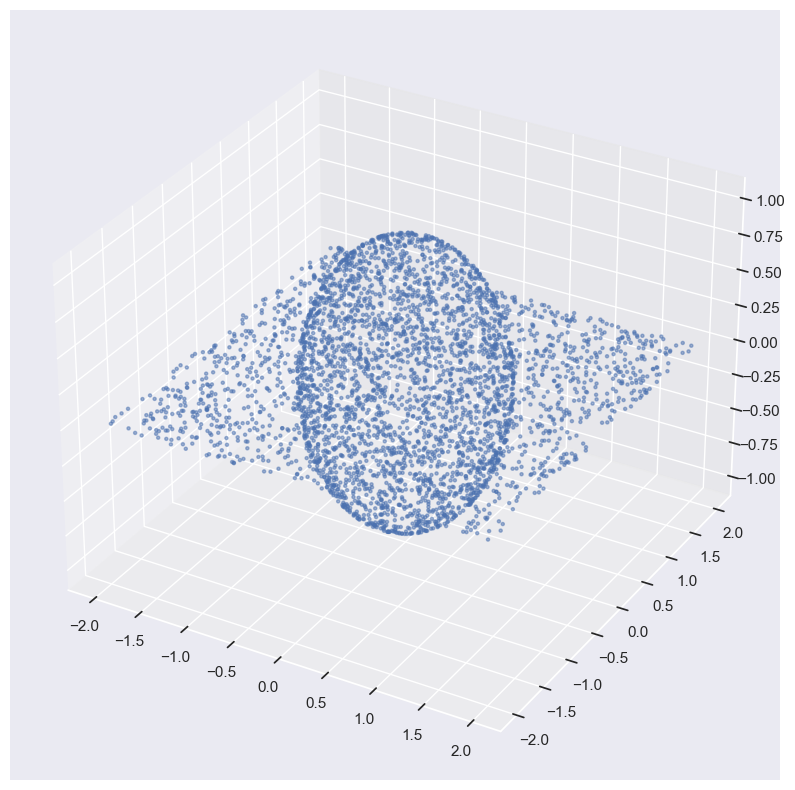

In [237]:
sns.set()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(point_cloud[:,0], point_cloud[:,1], point_cloud[:,2], s=5, alpha = 0.5);

In [138]:
from scipy.spatial import distance_matrix

def local_neighborhood(data, scale):
    D = distance_matrix(data, data)
    n = scale[1]-scale[0]
    local_neigh = np.ndarray(shape=(len(D),n), dtype=int, order='F')
    radius = np.ndarray(shape=(len(D),2), dtype=float, order='F')
    for i in range(len(D)):
        local_neigh[i] = np.argsort(D[i])[scale[0]:scale[1]]
    D.sort()
    for i in range(len(D)):
        radius[i] = [D[i][scale[0]], D[i][scale[1]]]
    return local_neigh, radius

    
def compute_local_persistence(data, method, scale):
    k1 = scale[0]
    k2 = scale[1]
    
    local_neigh, radius = local_neighborhood(data, method, [k1, k2])
    
    rips = Rips(2)
    mask = []
    for i in range(len(data)):
        dgm = rips.fit_transform(data[local_neigh[i]])
        dgms = {}
        dgms[0] = dgm[0][:-1]
        dgms[1] = dgm[1]
        dgms[2] = dgm[2]
        lifetime = {}
        rel_lifetime = {}
        for j in range(3):
            lifetime[j] = dgms[j][:,1]-dgms[j][:,0]
            rel_lifetime[j] = np.sort(lifetime[j]/lifetime[j].sum())[::-1]
        
        r1 = radius[i][0]
        r2 = radius[i][1]
            
        N = np.where(lifetime[1]>r2-r1)[0]
        
        # here we only focus on betti 1
        if len(N)==0:
            mask.append(0) #boundary
        elif len(N)==1:
            mask.append(1) #regular point
        else:
            mask.append(2) # singular point

    return np.array(mask)

In [242]:
k2 = 90
k1 = 50
mask = compute_local_persistence(point_cloud, 'knn', [k1, k2])

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


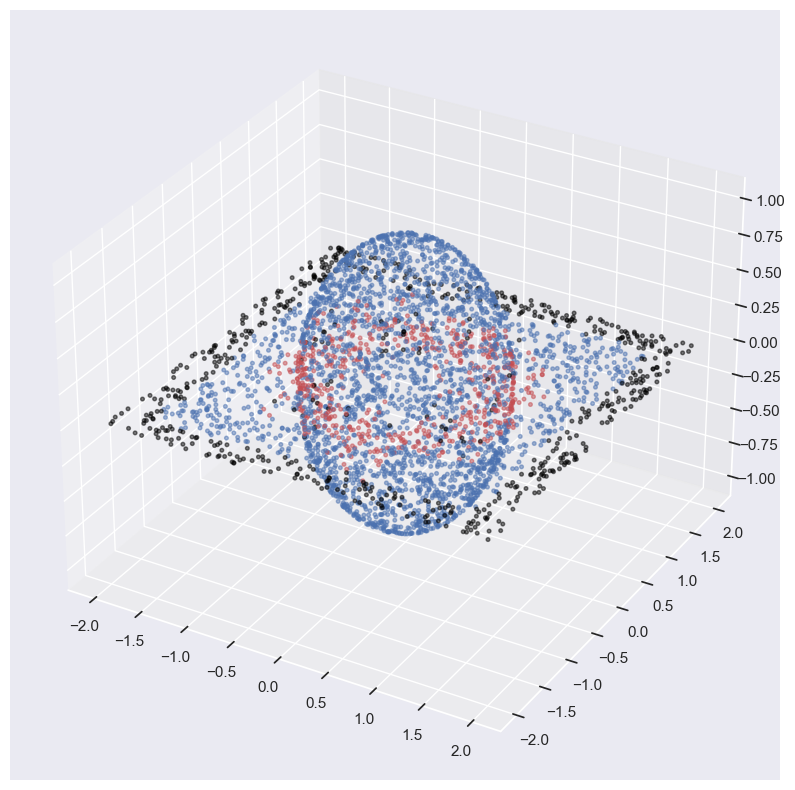

In [243]:
sns.set()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
colormap = np.array(['black', 'b', 'r'])
ax.scatter(point_cloud[:,0], point_cloud[:,1], point_cloud[:,2], s=7, c = colormap[mask], alpha = 0.5);